In [1]:
import pandas as pd
import tmplot as tmp
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from statistics import mean
import numpy as np
import statistics
from statsmodels.tsa.stattools import adfuller
sns.set_theme(palette="pastel")

In [2]:
work_dir = "C:/Users/fabia/OneDrive - Otto-Friedrich-Universität Bamberg/Master/Masterarbeit/Data"

In [3]:
comments_df = pd.read_json(work_dir + "/Comment/comments_with-sentiment.json")
replies_df = pd.read_json(work_dir + "/Comment/replies_with-sentiment.json")

In [4]:
video_topics = pd.read_csv(work_dir + "/Video/video_topics.csv")

In [5]:
print(video_topics.head())

   topic     video_id                                              title  \
0      2  vYzSzy6IwRI  E-AUTO mit 100% WASSERKRAFT laden | Prototyp n...   
1      2  Ad8knG-9l2A  Breaking Elektro-News: Xiaomi plant Elektroaut...   
2      1  SVyPVVXFpkU  Model 3 Facelift (SR & LR): Analyse der Tests ...   
3      3  z67yc8r2WNw  Probleme und Mängel an meinem Audi E-Tron, Upd...   
4      0  71SbVFBhaZk  STAT E-STICS #12 | KIA EV6 und alle Elektroaut...   

           published_at                channel_id  view_count  like_count  \
0  2021-04-01T08:00:27Z  UCaCaZ-vKtnMG2_FKmEePChQ      4217.0       493.0   
1  2021-04-01T05:00:02Z  UCsNdsFTTBj5jcRJSWeJ8-Xg      7432.0       613.0   
2  2021-04-01T16:15:55Z  UCasePAQ_q7tbUGybICCj4NQ      5530.0       342.0   
3  2021-04-02T17:11:32Z  UCddkvrnYqGRfODPMUQqisiw      6389.0       291.0   
4  2021-04-02T15:30:01Z  UCDDj2GWklzZ09X7R9OtsX3Q     38400.0       508.0   

   comment_count  job  id  valid  \
0            193    0   0  valid   
1       

In [6]:
print(comments_df.head())
print(replies_df.head())

   level_0  index  table_id     video_id  job page       date      author  \
0        0      0     10061  kjwiFMxRotQ   85      2022-03-08  Car Maniac   
1        1      1     10062  kjwiFMxRotQ   85      2022-03-08      Dennis   
2        2      2     10063  kjwiFMxRotQ   85      2022-03-08   Karl Napp   
3        3      3     10064  kjwiFMxRotQ   85      2022-03-08       Ed Sa   
4        4      4     10065  kjwiFMxRotQ   85      2022-03-08  MetalJaska   

   likes   published     updated  reply_count                  comment_id  \
0    437  2022-02-25  2022-02-25          108  UgxrA7-S9AiWwCGK8nh4AaABAg   
1      0  2022-03-08  2022-03-08            0  UgwlX0wQuL4vSc2dUu14AaABAg   
2      1  2022-03-08  2022-03-08            0  UgwxGcXqAkDNrle96V54AaABAg   
3      0  2022-03-08  2022-03-08            0  Ugzo6Qq8uCYpTJKGZFZ4AaABAg   
4      0  2022-03-08  2022-03-08            0  UgyHMgEX65XJeuwXlBZ4AaABAg   

                                             comment  \
0  <b>Liebe Freund

In [7]:
merged_comments = pd.merge(video_topics,comments_df,on='video_id',how='right')


merged_replies = pd.merge(video_topics,replies_df,on='video_id',how='right')

In [8]:
def f(row):
    float_compound = float(row['compound'])
    if float_compound >= 0.05:
        val = 'Positive'
    elif float_compound <= -0.05:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val

In [9]:
merged_comments['sentiment'] = merged_comments.apply(f, axis=1)
merged_replies['sentiment'] = merged_replies.apply(f, axis=1)

In [10]:
merged_comments['published'] = pd.to_datetime(merged_comments['published'], errors='coerce')
merged_replies['published'] = pd.to_datetime(merged_replies['published'], errors='coerce')


merged_comments['published'] = merged_comments['published'].dt.strftime('%d-%m-%Y')
merged_replies['published'] = merged_replies['published'].dt.strftime('%d-%m-%Y')
print(merged_comments['published'])
print(merged_replies['published'])

0         25-02-2022
1         08-03-2022
2         08-03-2022
3         08-03-2022
4         08-03-2022
             ...    
532519    30-07-2021
532520    30-07-2021
532521    30-07-2021
532522    30-07-2021
532523    30-07-2021
Name: published, Length: 532524, dtype: object
0         06-03-2022
1         04-03-2022
2         03-03-2022
3         03-03-2022
4         06-03-2022
             ...    
400777    03-08-2021
400778    03-08-2021
400779    30-07-2021
400780    30-07-2021
400781    30-07-2021
Name: published, Length: 400782, dtype: object


In [11]:
topic_0_df = merged_comments.loc[merged_comments['topic'] == 0]
topic_1_df = merged_comments.loc[merged_comments['topic'] == 1]
topic_2_df = merged_comments.loc[merged_comments['topic'] == 2]
topic_3_df = merged_comments.loc[merged_comments['topic'] == 3]

topic_0 = topic_0_df.groupby(['sentiment']).size()
topic_1 = topic_1_df.groupby(['sentiment']).size()
topic_2 = topic_2_df.groupby(['sentiment']).size()
topic_3 = topic_3_df.groupby(['sentiment']).size()

positive_0 = topic_0['Positive']
positive_1 = topic_1['Positive'] 
positive_2 = topic_2['Positive'] 
positive_3 = topic_3['Positive'] 

neutral_0 = topic_0['Neutral']
neutral_1 = topic_1['Neutral']
neutral_2 = topic_2['Neutral']
neutral_3 = topic_3['Neutral']

negative_0 = topic_0['Negative']
negative_1 = topic_1['Negative']
negative_2 = topic_2['Negative']
negative_3 = topic_3['Negative']

topic_labels = ['Positive', 'Neutral', 'Negative' ]
topic_0_data = [positive_0, neutral_0, negative_0]
topic_1_data = [positive_1, neutral_1, negative_1]
topic_2_data = [positive_2, neutral_2, negative_2]
topic_3_data = [positive_3, neutral_3, negative_3]

In [12]:
replies_topic_0_df = merged_replies.loc[merged_replies['topic'] == 0]
replies_topic_1_df = merged_replies.loc[merged_replies['topic'] == 1]
replies_topic_2_df = merged_replies.loc[merged_replies['topic'] == 2]
replies_topic_3_df = merged_replies.loc[merged_replies['topic'] == 3]

replies_topic_0 = replies_topic_0_df.groupby(['sentiment']).size()
replies_topic_1 = replies_topic_1_df.groupby(['sentiment']).size()
replies_topic_2 = replies_topic_2_df.groupby(['sentiment']).size()
replies_topic_3 = replies_topic_3_df.groupby(['sentiment']).size()

replies_positive_0 = replies_topic_0['Positive']
replies_positive_1 = replies_topic_1['Positive'] 
replies_positive_2 = replies_topic_2['Positive'] 
replies_positive_3 = replies_topic_3['Positive'] 

replies_neutral_0 = replies_topic_0['Neutral']
replies_neutral_1 = replies_topic_1['Neutral']
replies_neutral_2 = replies_topic_2['Neutral']
replies_neutral_3 = replies_topic_3['Neutral']

replies_negative_0 = replies_topic_0['Negative']
replies_negative_1 = replies_topic_1['Negative']
replies_negative_2 = replies_topic_2['Negative']
replies_negative_3 = replies_topic_3['Negative']

topic_labels = ['Positive', 'Neutral', 'Negative' ]
replies_topic_0_data = [replies_positive_0, replies_neutral_0, replies_negative_0]
replies_topic_1_data = [replies_positive_1, replies_neutral_1, replies_negative_1]
replies_topic_2_data = [replies_positive_2, replies_neutral_2, replies_negative_2]
replies_topic_3_data = [replies_positive_3, replies_neutral_3, replies_negative_3]

In [13]:
replies_sum_topic_0 = sum(replies_topic_0_data)
print(replies_topic_0_data[0]/replies_sum_topic_0)
print(replies_topic_0_data[1]/replies_sum_topic_0)
print(replies_topic_0_data[2]/replies_sum_topic_0)

replies_sum_topic_1 = sum(replies_topic_1_data)
print(replies_topic_1_data[0]/replies_sum_topic_1)
print(replies_topic_1_data[1]/replies_sum_topic_1)
print(replies_topic_1_data[2]/replies_sum_topic_1)

replies_sum_topic_2 = sum(replies_topic_2_data)
print(replies_topic_2_data[0]/replies_sum_topic_2)
print(replies_topic_2_data[1]/replies_sum_topic_2)
print(replies_topic_2_data[2]/replies_sum_topic_2)

replies_sum_topic_3 = sum(replies_topic_3_data)
print(replies_topic_3_data[0]/replies_sum_topic_3)
print(replies_topic_3_data[1]/replies_sum_topic_3)
print(replies_topic_3_data[2]/replies_sum_topic_3)

0.5486949396434567
0.25084938844032295
0.20045567191622032
0.5296893118477348
0.2362269582950138
0.2340837298572514
0.5342406676898489
0.23761082712870535
0.22814850518144572
0.5704420185729299
0.22534154030926287
0.2042164411178073


In [14]:
sum_topic_0 = sum(topic_0_data)
print(topic_0_data[0]/sum_topic_0)
print(topic_0_data[1]/sum_topic_0)
print(topic_0_data[2]/sum_topic_0)

sum_topic_1 = sum(topic_1_data)
print(topic_1_data[0]/sum_topic_1)
print(topic_1_data[1]/sum_topic_1)
print(topic_1_data[2]/sum_topic_1)

sum_topic_2 = sum(topic_2_data)
print(topic_2_data[0]/sum_topic_2)
print(topic_2_data[1]/sum_topic_2)
print(topic_2_data[2]/sum_topic_2)

sum_topic_3 = sum(topic_3_data)
print(topic_3_data[0]/sum_topic_3)
print(topic_3_data[1]/sum_topic_3)
print(topic_3_data[2]/sum_topic_3)

0.6115275463172795
0.19031747470591928
0.19815497897680126
0.597026631344116
0.17678704220115263
0.22618632645473136
0.596423335095401
0.1794217093386262
0.2241549555659728
0.6292566454329994
0.175622692710949
0.1951206618560516


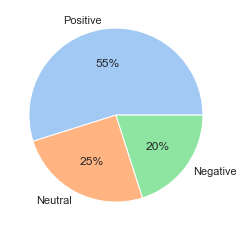

In [15]:
# Replies topic 0
plt.pie(replies_topic_0_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

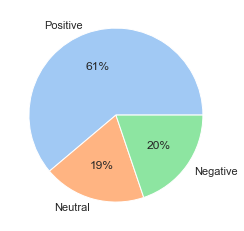

In [16]:
# Comments topic 0
plt.pie(topic_0_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

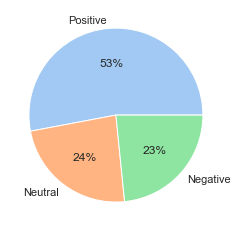

In [17]:
# replies topic 1
plt.pie(replies_topic_1_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

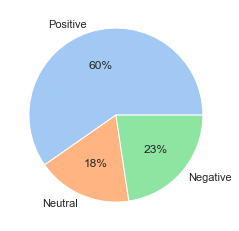

In [18]:
# comments topic 1
plt.pie(topic_1_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

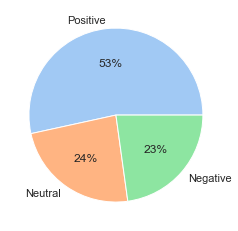

In [19]:
# replies topic 2
plt.pie(replies_topic_2_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

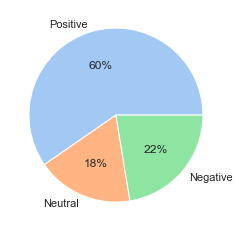

In [20]:
# comments topic 2
plt.pie(topic_2_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

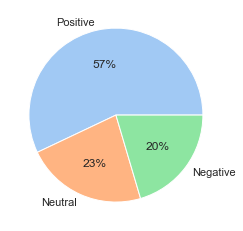

In [21]:
# replies topic 3
plt.pie(replies_topic_3_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

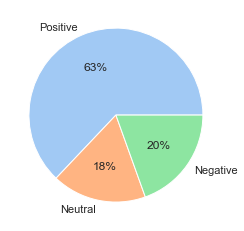

In [22]:
# comments topic 3
plt.pie(topic_3_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

In [23]:
topic_0_total = positive_0 + neutral_0 + negative_0
topic_1_total = positive_1 + neutral_1 + negative_1
topic_2_total = positive_2 + neutral_2 + negative_2
topic_3_total = positive_3 + neutral_3 + negative_3

positive_0_percentage = (positive_0 / topic_0_total) * 100
neutral_0_percentage = (neutral_0 / topic_0_total) * 100
negative_0_percentage = (negative_0 / topic_0_total) * 100

positive_1_percentage = (positive_1 / topic_1_total) * 100
neutral_1_percentage = (neutral_1 / topic_1_total) * 100
negative_1_percentage = (negative_1 / topic_1_total) * 100

positive_2_percentage = (positive_2 / topic_2_total) * 100
neutral_2_percentage = (neutral_2 / topic_2_total) * 100
negative_2_percentage = (negative_2 / topic_2_total) * 100

positive_3_percentage = (positive_3 / topic_3_total) * 100
neutral_3_percentage = (neutral_3 / topic_3_total) * 100
negative_3_percentage = (negative_3 / topic_3_total) * 100

In [24]:
replies_topic_0_total = replies_positive_0 + replies_neutral_0 + replies_negative_0
replies_topic_1_total = replies_positive_1 + replies_neutral_1 + replies_negative_1
replies_topic_2_total = replies_positive_2 + replies_neutral_2 + replies_negative_2
replies_topic_3_total = replies_positive_3 + replies_neutral_3 + replies_negative_3

replies_positive_0_percentage = (replies_positive_0 / replies_topic_0_total) * 100
replies_neutral_0_percentage = (replies_neutral_0 / replies_topic_0_total) * 100
replies_negative_0_percentage = (replies_negative_0 / replies_topic_0_total) * 100

replies_positive_1_percentage = (replies_positive_1 / replies_topic_1_total) * 100
replies_neutral_1_percentage = (replies_neutral_1 / replies_topic_1_total) * 100
replies_negative_1_percentage = (replies_negative_1 / replies_topic_1_total) * 100

replies_positive_2_percentage = (replies_positive_2 / replies_topic_2_total) * 100
replies_neutral_2_percentage = (replies_neutral_2 / replies_topic_2_total) * 100
replies_negative_2_percentage = (replies_negative_2 / replies_topic_2_total) * 100

replies_positive_3_percentage = (replies_positive_3 / replies_topic_3_total) * 100
replies_neutral_3_percentage = (replies_neutral_3 / replies_topic_3_total) * 100
replies_negative_3_percentage = (replies_negative_3 / replies_topic_3_total) * 100

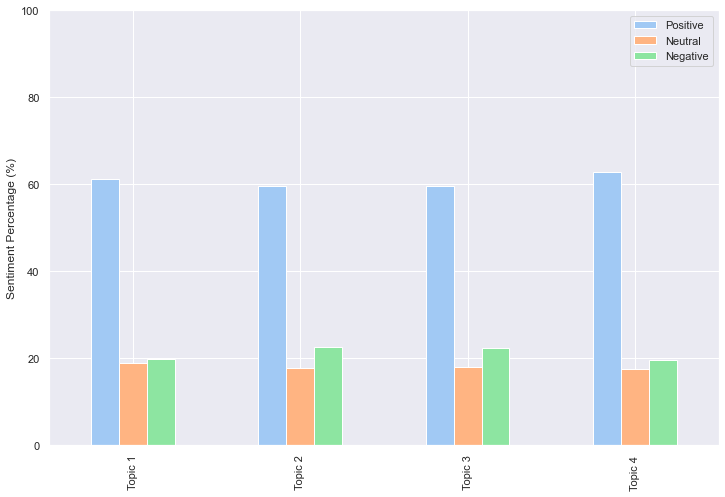

In [28]:
data=[["Topic 1",positive_0_percentage,neutral_0_percentage,negative_0_percentage],
      ["Topic 2",positive_1_percentage,neutral_1_percentage,negative_1_percentage],
      ["Topic 3",positive_2_percentage,neutral_2_percentage,negative_2_percentage],
      ["Topic 4",positive_3_percentage,neutral_3_percentage,negative_3_percentage]
     ]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(12,8))
plt.xlabel('')
plt.ylabel('Sentiment Percentage (%)') 
plt.ylim(0, 100)
plt.show()

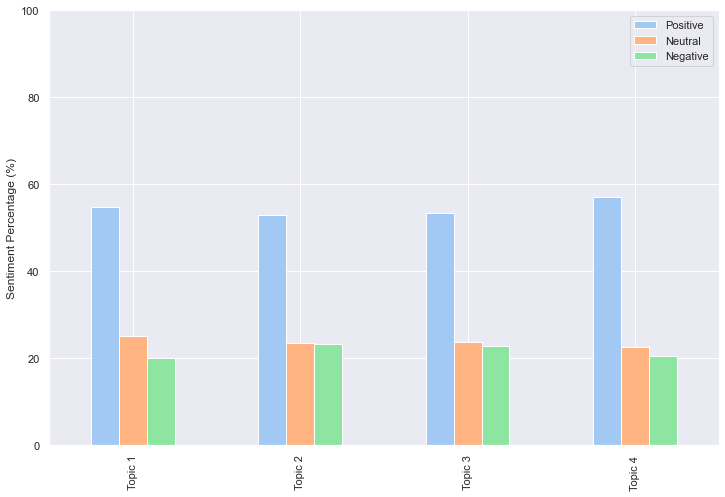

In [27]:
data=[["Topic 1",replies_positive_0_percentage,replies_neutral_0_percentage,replies_negative_0_percentage],
      ["Topic 2",replies_positive_1_percentage,replies_neutral_1_percentage,replies_negative_1_percentage],
      ["Topic 3",replies_positive_2_percentage,replies_neutral_2_percentage,replies_negative_2_percentage],
      ["Topic 4",replies_positive_3_percentage,replies_neutral_3_percentage,replies_negative_3_percentage]
     ]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(12,8))
plt.xlabel('')
plt.ylabel('Sentiment Percentage (%)') 
plt.ylim(0, 100)
plt.show()

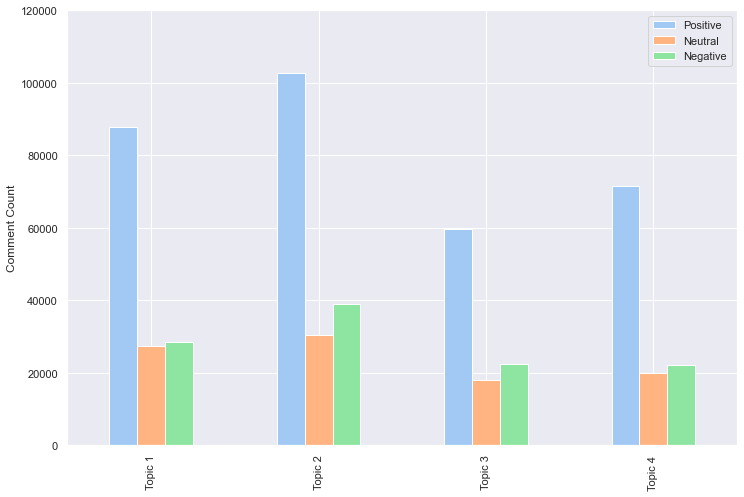

In [30]:
data=[["Topic 1",positive_0,neutral_0,negative_0],
      ["Topic 2",positive_1,neutral_1,negative_1],
      ["Topic 3",positive_2,neutral_2,negative_2],
      ["Topic 4",positive_3,neutral_3,negative_3]
     ]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(12,8))
plt.xlabel('')
plt.ylabel('Comment Count') 
plt.ylim(0, 120000)
plt.show()

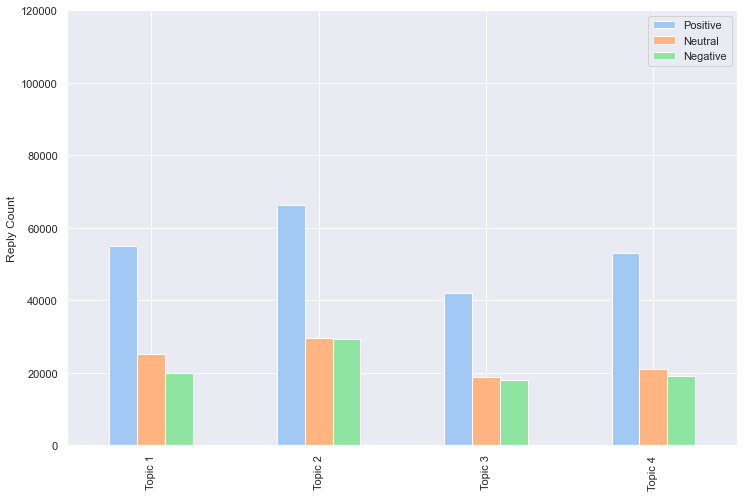

In [33]:
data=[["Topic 1",replies_positive_0,replies_neutral_0,replies_negative_0],
      ["Topic 2",replies_positive_1,replies_neutral_1,replies_negative_1],
      ["Topic 3",replies_positive_2,replies_neutral_2,replies_negative_2],
      ["Topic 4",replies_positive_3,replies_neutral_3,replies_negative_3]
     ]
df=pd.DataFrame(data,columns=["Topic","Positive","Neutral","Negative"])
df.plot(ylabel = "Count", x="Topic", y=["Positive", "Neutral", "Negative"], kind="bar",figsize=(12,8))
plt.xlabel('')
plt.ylabel('Reply Count') 
plt.ylim(0, 120000)
plt.show()

In [34]:
topic_0_df['published'] = pd.to_datetime(topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
topic_1_df['published'] = pd.to_datetime(topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
topic_2_df['published'] = pd.to_datetime(topic_2_df['published'], format='%d-%m-%Y', errors='coerce')
topic_3_df['published'] = pd.to_datetime(topic_3_df['published'], format='%d-%m-%Y', errors='coerce')

start_20 = datetime.datetime.strptime('01-01-2020', '%d-%m-%Y')
end_20 = datetime.datetime.strptime('31-12-2020', '%d-%m-%Y')

start_21 = datetime.datetime.strptime('01-01-2021', '%d-%m-%Y')
end_21 = datetime.datetime.strptime('31-12-2021', '%d-%m-%Y')

start_22 = datetime.datetime.strptime('01-01-2022', '%d-%m-%Y')
end_22 = datetime.datetime.strptime('31-12-2022', '%d-%m-%Y')


topic_0_2020 = topic_0_df.loc[(topic_0_df['published']>=start_20) & (topic_0_df['published']<= end_20)]
topic_1_2020 = topic_1_df.loc[(topic_1_df['published']>=start_20) & (topic_1_df['published']<= end_20)]
topic_2_2020 = topic_2_df.loc[(topic_2_df['published']>=start_20) & (topic_2_df['published']<= end_20)]
topic_3_2020 = topic_3_df.loc[(topic_3_df['published']>=start_20) & (topic_3_df['published']<= end_20)]

topic_0_2021 = topic_0_df.loc[(topic_0_df['published']>=start_21) & (topic_0_df['published']<= end_21)]
topic_1_2021 = topic_1_df.loc[(topic_1_df['published']>=start_21) & (topic_1_df['published']<= end_21)]
topic_2_2021 = topic_2_df.loc[(topic_2_df['published']>=start_21) & (topic_2_df['published']<= end_21)]
topic_3_2021 = topic_3_df.loc[(topic_3_df['published']>=start_21) & (topic_3_df['published']<= end_21)]

topic_0_2022 = topic_0_df.loc[(topic_0_df['published']>=start_22) & (topic_0_df['published']<= end_22)]
topic_1_2022 = topic_1_df.loc[(topic_1_df['published']>=start_22) & (topic_1_df['published']<= end_22)]
topic_2_2022 = topic_2_df.loc[(topic_2_df['published']>=start_22) & (topic_2_df['published']<= end_22)]
topic_3_2022 = topic_3_df.loc[(topic_3_df['published']>=start_22) & (topic_3_df['published']<= end_22)]

C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\3473039644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_0_df['published'] = pd.to_datetime(topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\3473039644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_1_df['published'] = pd.to_datetime(topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\3473039644.py:3: SettingWithCopyWar

In [35]:
replies_topic_0_df['published'] = pd.to_datetime(replies_topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
replies_topic_1_df['published'] = pd.to_datetime(replies_topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
replies_topic_2_df['published'] = pd.to_datetime(replies_topic_2_df['published'], format='%d-%m-%Y', errors='coerce')
replies_topic_3_df['published'] = pd.to_datetime(replies_topic_3_df['published'], format='%d-%m-%Y', errors='coerce')

replies_topic_0_2020 = replies_topic_0_df.loc[(replies_topic_0_df['published']>=start_20) & (replies_topic_0_df['published']<= end_20)]
replies_topic_1_2020 = replies_topic_1_df.loc[(replies_topic_1_df['published']>=start_20) & (replies_topic_1_df['published']<= end_20)]
replies_topic_2_2020 = replies_topic_2_df.loc[(replies_topic_2_df['published']>=start_20) & (replies_topic_2_df['published']<= end_20)]
replies_topic_3_2020 = replies_topic_3_df.loc[(replies_topic_3_df['published']>=start_20) & (replies_topic_3_df['published']<= end_20)]

replies_topic_0_2021 = replies_topic_0_df.loc[(replies_topic_0_df['published']>=start_21) & (replies_topic_0_df['published']<= end_21)]
replies_topic_1_2021 = replies_topic_1_df.loc[(replies_topic_1_df['published']>=start_21) & (replies_topic_1_df['published']<= end_21)]
replies_topic_2_2021 = replies_topic_2_df.loc[(replies_topic_2_df['published']>=start_21) & (replies_topic_2_df['published']<= end_21)]
replies_topic_3_2021 = replies_topic_3_df.loc[(replies_topic_3_df['published']>=start_21) & (replies_topic_3_df['published']<= end_21)]

replies_topic_0_2022 = replies_topic_0_df.loc[(replies_topic_0_df['published']>=start_22) & (replies_topic_0_df['published']<= end_22)]
replies_topic_1_2022 = replies_topic_1_df.loc[(replies_topic_1_df['published']>=start_22) & (replies_topic_1_df['published']<= end_22)]
replies_topic_2_2022 = replies_topic_2_df.loc[(replies_topic_2_df['published']>=start_22) & (replies_topic_2_df['published']<= end_22)]
replies_topic_3_2022 = replies_topic_3_df.loc[(replies_topic_3_df['published']>=start_22) & (replies_topic_3_df['published']<= end_22)]

C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\3075119176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_topic_0_df['published'] = pd.to_datetime(replies_topic_0_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\3075119176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_topic_1_df['published'] = pd.to_datetime(replies_topic_1_df['published'], format='%d-%m-%Y', errors='coerce')
C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\307

In [36]:
topic_0_2020 = topic_0_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_0_2020['published'] = topic_0_2020['published'].dt.strftime('%d-%m-%Y')
topic_1_2020 = topic_1_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_1_2020['published'] = topic_1_2020['published'].dt.strftime('%d-%m-%Y')
topic_2_2020 = topic_2_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_2_2020['published'] = topic_2_2020['published'].dt.strftime('%d-%m-%Y')
topic_3_2020 = topic_3_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_3_2020['published'] = topic_3_2020['published'].dt.strftime('%d-%m-%Y')

topic_0_2021 = topic_0_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_0_2021['published'] = topic_0_2021['published'].dt.strftime('%d-%m-%Y')
topic_1_2021 = topic_1_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_1_2021['published'] = topic_1_2021['published'].dt.strftime('%d-%m-%Y')
topic_2_2021 = topic_2_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_2_2021['published'] = topic_2_2021['published'].dt.strftime('%d-%m-%Y')
topic_3_2021 = topic_3_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_3_2021['published'] = topic_3_2021['published'].dt.strftime('%d-%m-%Y')

topic_0_2022 = topic_0_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_0_2022['published'] = topic_0_2022['published'].dt.strftime('%d-%m-%Y')
topic_1_2022 = topic_1_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_1_2022['published'] = topic_1_2022['published'].dt.strftime('%d-%m-%Y')
topic_2_2022 = topic_2_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_2_2022['published'] = topic_2_2022['published'].dt.strftime('%d-%m-%Y')
topic_3_2022 = topic_3_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
topic_3_2022['published'] = topic_3_2022['published'].dt.strftime('%d-%m-%Y')

In [37]:
replies_topic_0_2020 = replies_topic_0_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_0_2020['published'] = replies_topic_0_2020['published'].dt.strftime('%d-%m-%Y')
replies_topic_1_2020 = replies_topic_1_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_1_2020['published'] = replies_topic_1_2020['published'].dt.strftime('%d-%m-%Y')
replies_topic_2_2020 = replies_topic_2_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_2_2020['published'] = replies_topic_2_2020['published'].dt.strftime('%d-%m-%Y')
replies_topic_3_2020 = replies_topic_3_2020.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_3_2020['published'] = replies_topic_3_2020['published'].dt.strftime('%d-%m-%Y')

replies_topic_0_2021 = replies_topic_0_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_0_2021['published'] = replies_topic_0_2021['published'].dt.strftime('%d-%m-%Y')
replies_topic_1_2021 = replies_topic_1_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_1_2021['published'] = replies_topic_1_2021['published'].dt.strftime('%d-%m-%Y')
replies_topic_2_2021 = replies_topic_2_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_2_2021['published'] = replies_topic_2_2021['published'].dt.strftime('%d-%m-%Y')
replies_topic_3_2021 = replies_topic_3_2021.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_3_2021['published'] = replies_topic_3_2021['published'].dt.strftime('%d-%m-%Y')

replies_topic_0_2022 = replies_topic_0_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_0_2022['published'] = replies_topic_0_2022['published'].dt.strftime('%d-%m-%Y')
replies_topic_1_2022 = replies_topic_1_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_1_2022['published'] = replies_topic_1_2022['published'].dt.strftime('%d-%m-%Y')
replies_topic_2_2022 = replies_topic_2_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_2_2022['published'] = replies_topic_2_2022['published'].dt.strftime('%d-%m-%Y')
replies_topic_3_2022 = replies_topic_3_2022.groupby('published', as_index=False, sort=True)['compound'].mean()
replies_topic_3_2022['published'] = replies_topic_3_2022['published'].dt.strftime('%d-%m-%Y')

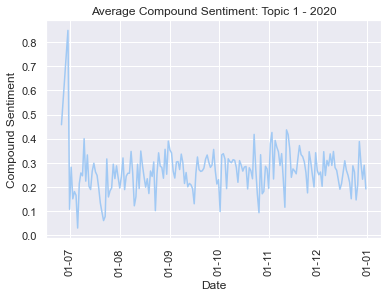

(-4.400034615288999, 0.00029679075488838456, 7, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, -433.7254322527547)
0.2649242667806528
     published  compound
0   2020-06-26  0.458000
1   2020-06-30  0.848100
2   2020-07-01  0.108269
3   2020-07-02  0.282139
4   2020-07-03  0.151378
..         ...       ...
181 2020-12-27  0.388251
182 2020-12-28  0.297391
183 2020-12-29  0.232322
184 2020-12-30  0.290075
185 2020-12-31  0.192345

[186 rows x 2 columns]


In [38]:
topic_0_2020['published'] = pd.to_datetime(topic_0_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_0_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')

plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_0_2020["compound"]))
print(mean(topic_0_2020["compound"]))

print(topic_0_2020)

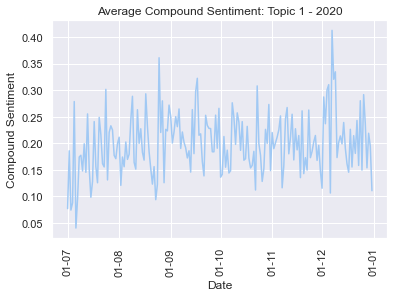

(-12.9849415180154, 2.8914507011791568e-24, 0, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, -499.9259784622757)
0.19917083891316434
     published  compound
0   2020-07-01  0.077045
1   2020-07-02  0.185894
2   2020-07-03  0.074288
3   2020-07-04  0.087944
4   2020-07-05  0.278638
..         ...       ...
179 2020-12-27  0.236575
180 2020-12-28  0.153765
181 2020-12-29  0.218925
182 2020-12-30  0.194787
183 2020-12-31  0.110734

[184 rows x 2 columns]


In [39]:
replies_topic_0_2020['published'] = pd.to_datetime(replies_topic_0_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=replies_topic_0_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')

plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_0_2020["compound"]))
print(mean(replies_topic_0_2020["compound"]))

print(replies_topic_0_2020)

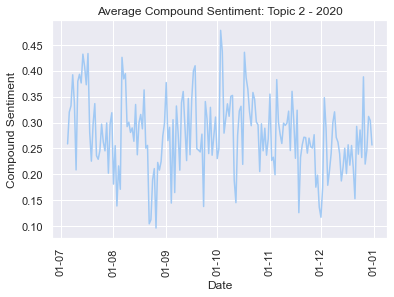

(-6.673555882389545, 4.524154594273722e-09, 1, 182, {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}, -436.58417960116844)
0.27660296771140247


In [40]:
topic_1_2020['published'] = pd.to_datetime(topic_2_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_1_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 2 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_1_2020["compound"]))
print(mean(topic_1_2020["compound"]))

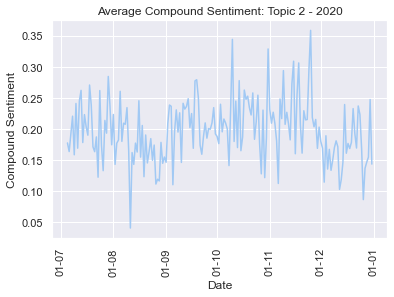

(-10.673644420677574, 4.106289456856155e-19, 0, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, -539.4544337353402)
0.19717590844256655


In [41]:
replies_topic_1_2020['published'] = pd.to_datetime(replies_topic_2_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=replies_topic_1_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 2 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_1_2020["compound"]))
print(mean(replies_topic_1_2020["compound"]))

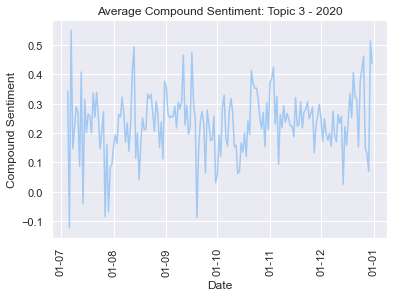

(-4.658591975949534, 0.00010058982092202584, 4, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, -300.07266888632455)
0.23665907922738547
    published  compound  anomaly_points
1  2020-07-06 -0.123567       -0.123567
22 2020-07-27 -0.084980       -0.084980
24 2020-07-29 -0.068606       -0.068606
76 2020-09-19 -0.087951       -0.087951


In [42]:
topic_2_2020['published'] = pd.to_datetime(topic_2_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_2_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 3 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_2_2020["compound"]))
print(mean(topic_2_2020["compound"]))

lower_bond = -0.05

res = topic_2_2020["compound"]
topic_2_2020["anomaly_points"] = res[res < lower_bond]

topic_2_2020_outlier = topic_2_2020[topic_2_2020['anomaly_points'].notna()]

print(topic_2_2020_outlier)




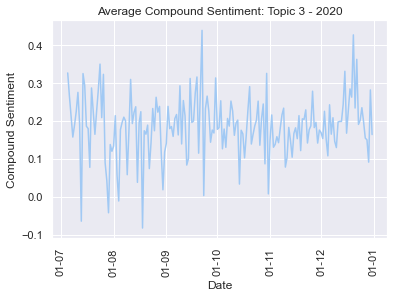

(-6.329850682233425, 2.9245101617979436e-08, 2, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, -369.9029346281782)
0.1858994195506537
    published  compound  anomaly_points
1  2020-07-06  0.264950             NaN
22 2020-07-28  0.042267             NaN
24 2020-07-30  0.137142             NaN
76 2020-09-20  0.114408             NaN


C:\Users\fabia\AppData\Local\Temp\ipykernel_3144\3497303240.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  replies_topic_2_2020_outlier = replies_topic_2_2020[topic_2_2020['anomaly_points'].notna()]


In [43]:
replies_topic_2_2020['published'] = pd.to_datetime(replies_topic_2_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=replies_topic_2_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 3 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_2_2020["compound"]))
print(mean(replies_topic_2_2020["compound"]))

lower_bond = -0.05

res = replies_topic_2_2020["compound"]
replies_topic_2_2020["anomaly_points"] = res[res < lower_bond]

replies_topic_2_2020_outlier = replies_topic_2_2020[topic_2_2020['anomaly_points'].notna()]

print(replies_topic_2_2020_outlier)




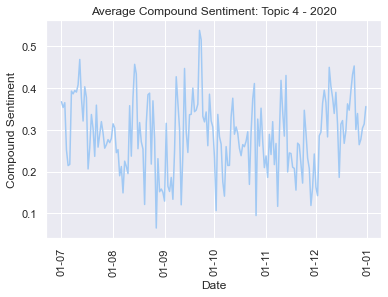

(-8.397161617634314, 2.2825743138870624e-13, 0, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, -373.9345451270501)
0.2874357765798176


In [44]:
topic_3_2020['published'] = pd.to_datetime(topic_3_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=topic_3_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 4 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_3_2020["compound"]))
print(mean(topic_3_2020["compound"]))

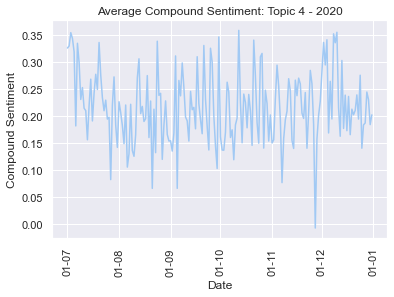

(-11.164526773296416, 2.735237752810061e-20, 0, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, -444.46161984631476)
0.21707062168310917


In [45]:
replies_topic_3_2020['published'] = pd.to_datetime(replies_topic_3_2020['published'], format = '%d-%m-%Y')

plot = sns.lineplot(x="published", y="compound", data=replies_topic_3_2020)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 4 - 2020')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_3_2020["compound"]))
print(mean(replies_topic_3_2020["compound"]))

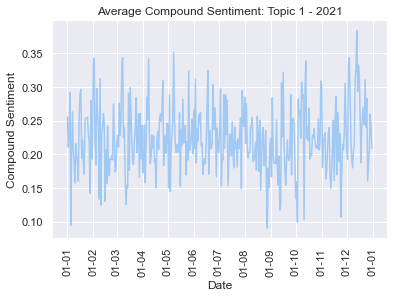

(-11.18777689485, 2.4108790498801154e-20, 1, 363, {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}, -1114.5684455415776)
0.22353159627712113


In [47]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_0_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_0_2021["compound"]))
print(mean(replies_topic_0_2021["compound"]))


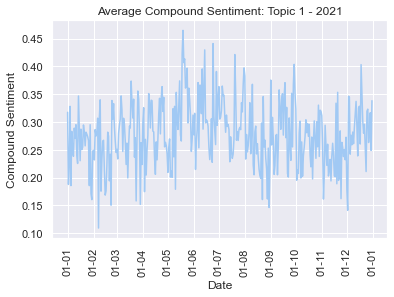

(-7.212291879486608, 2.2186874520027175e-10, 2, 362, {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}, -1032.5282853074423)
0.27802035359686295


In [48]:
plot = sns.lineplot(x="published", y="compound", data=topic_0_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_0_2021["compound"]))
print(mean(topic_0_2021["compound"]))


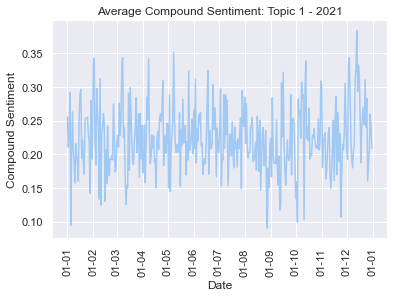

(-11.18777689485, 2.4108790498801154e-20, 1, 363, {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}, -1114.5684455415776)
0.22353159627712113


In [49]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_0_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_0_2021["compound"]))
print(mean(replies_topic_0_2021["compound"]))


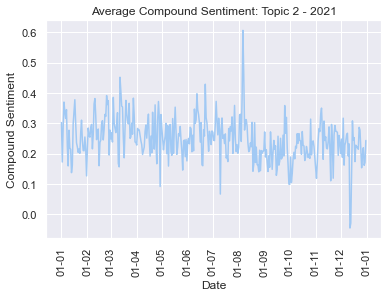

Empty DataFrame
Columns: [published, compound, anomaly_points]
Index: []
(-7.748033959480663, 1.0195149559902862e-11, 2, 362, {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}, -930.336224572889)
0.247589784505128


In [50]:
plot = sns.lineplot(x="published", y="compound", data=topic_1_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 2 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = topic_1_2021["compound"]
topic_1_2021["anomaly_points"] = res[res < lower_bond]

topic_1_2021_outlier = topic_1_2021[topic_1_2021['anomaly_points'].notna()]

print(topic_1_2021_outlier)


print(adfuller(topic_1_2021["compound"]))
print(mean(topic_1_2021["compound"]))

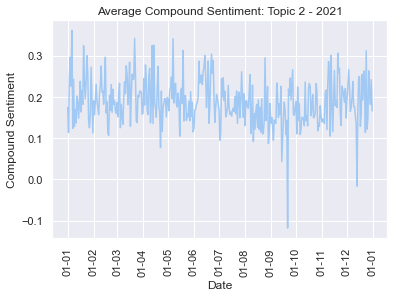

      published  compound  anomaly_points
263  21-09-2021 -0.118096       -0.118096
(-5.379708550059087, 3.73595293506503e-06, 7, 357, {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}, -1031.8632192319433)
0.18878906151694172


In [51]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_1_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 2 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = replies_topic_1_2021["compound"]
replies_topic_1_2021["anomaly_points"] = res[res < lower_bond]

replies_topic_1_2021_outlier = replies_topic_1_2021[replies_topic_1_2021['anomaly_points'].notna()]

print(replies_topic_1_2021_outlier)


print(adfuller(replies_topic_1_2021["compound"]))
print(mean(replies_topic_1_2021["compound"]))

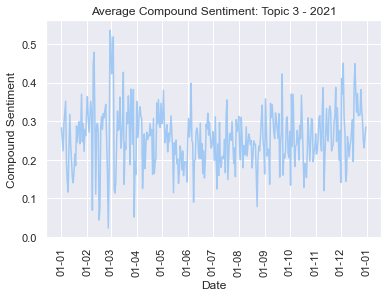

(-13.916142596729177, 5.39919618524752e-26, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, -827.4796465285308)
0.25745444131963346


In [52]:
plot = sns.lineplot(x="published", y="compound", data=topic_2_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 3 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_2_2021["compound"]))
print(mean(topic_2_2021["compound"]))

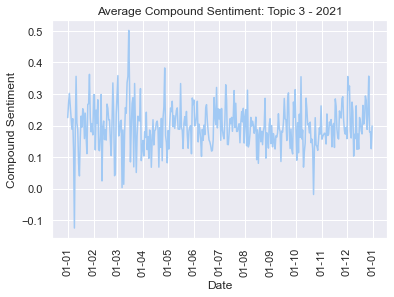

(-15.414037345888355, 3.096310802899714e-28, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, -897.008231661639)
0.19580976897151028


In [53]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_2_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 3 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_2_2021["compound"]))
print(mean(replies_topic_2_2021["compound"]))

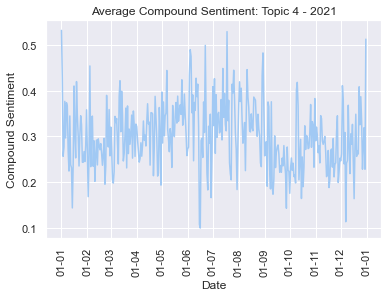

(-2.3155750823046097, 0.16699389057370828, 16, 348, {'1%': -3.4492815848836296, '5%': -2.8698813715275406, '10%': -2.5712138845950587}, -892.823967562178)
0.30110891672748336


In [54]:
plot = sns.lineplot(x="published", y="compound", data=topic_3_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 4 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_3_2021["compound"]))
print(mean(topic_3_2021["compound"]))

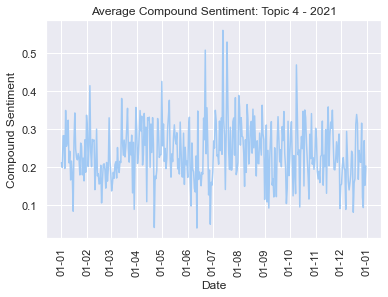

(-6.842073813024771, 1.7807211341338396e-09, 4, 360, {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}, -805.0134629583758)
0.2375085989753331


In [55]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_3_2021)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 4 - 2021')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_3_2021["compound"]))
print(mean(replies_topic_3_2021["compound"]))

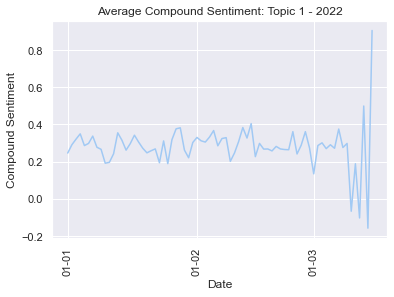

     published  compound  anomaly_points
68  10-03-2022 -0.066433       -0.066433
70  12-03-2022 -0.102600       -0.102600
72  14-03-2022 -0.157467       -0.157467
(-4.684205212064769, 9.009396656679011e-05, 4, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, -120.44430961180154)
0.28262137203593823


In [56]:
plot = sns.lineplot(x="published", y="compound", data=topic_0_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = topic_0_2022["compound"]
topic_0_2022["anomaly_points"] = res[res < lower_bond]

topic_0_2022_outlier = topic_0_2022[topic_0_2022['anomaly_points'].notna()]

print(topic_0_2022_outlier)

print(adfuller(topic_0_2022["compound"]))
print(mean(topic_0_2022["compound"]))

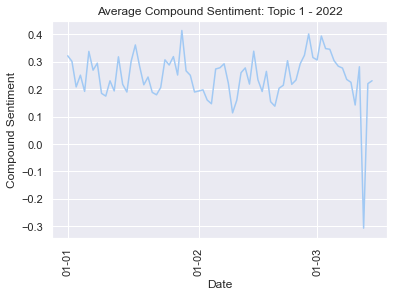

     published  compound  anomaly_points
70  12-03-2022   -0.3078         -0.3078
(-4.37044821269849, 0.00033469260194029095, 1, 71, {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}, -107.46092944827984)
0.2447856852274952


In [57]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_0_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 1 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = replies_topic_0_2022["compound"]
replies_topic_0_2022["anomaly_points"] = res[res < lower_bond]

replies_topic_0_2022_outlier = replies_topic_0_2022[replies_topic_0_2022['anomaly_points'].notna()]

print(replies_topic_0_2022_outlier)

print(adfuller(replies_topic_0_2022["compound"]))
print(mean(replies_topic_0_2022["compound"]))

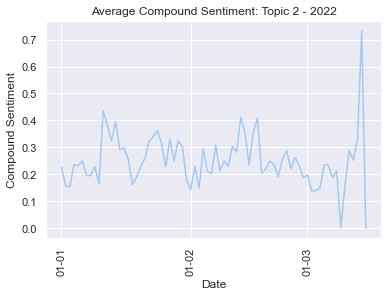

(-2.8200317959512344, 0.05546884998919735, 5, 68, {'1%': -3.530398990560757, '5%': -2.9050874099328317, '10%': -2.5900010121107266}, -105.83548158233907)
0.25123483485567083


In [58]:
plot = sns.lineplot(x="published", y="compound", data=topic_1_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 2 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()


print(adfuller(topic_1_2022["compound"]))
print(mean(topic_1_2022["compound"]))

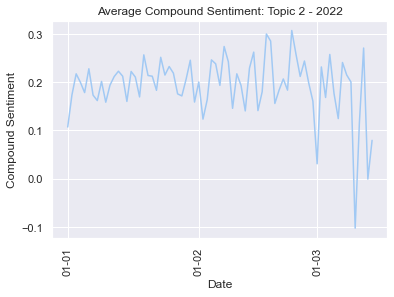

(0.1019494185539695, 0.9661939381698975, 8, 64, {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}, -156.23710848187613)
0.1923285860371093


In [59]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_1_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 2 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()


print(adfuller(replies_topic_1_2022["compound"]))
print(mean(replies_topic_1_2022["compound"]))

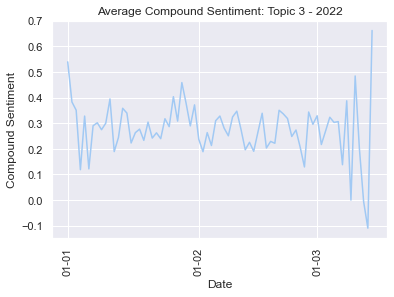

     published  compound  anomaly_points
71  13-03-2022  -0.10965        -0.10965
(-3.5362532687029558, 0.007103410179122666, 3, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, -91.99048623866116)
0.2781245422230412


In [60]:
plot = sns.lineplot(x="published", y="compound", data=topic_2_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 3 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = topic_2_2022["compound"]
topic_2_2022["anomaly_points"] = res[res < lower_bond]

topic_2_2022_outlier = topic_2_2022[topic_2_2022['anomaly_points'].notna()]

print(topic_2_2022_outlier)

print(adfuller(topic_2_2022["compound"]))
print(mean(topic_2_2022["compound"]))

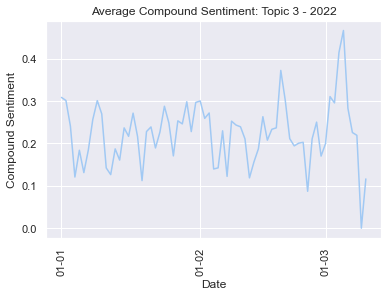

Empty DataFrame
Columns: [published, compound, anomaly_points]
Index: []
(-4.907621536520594, 3.3702444034280336e-05, 3, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, -144.7461637836335)
0.22342972980909453


In [61]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_2_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 3 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

lower_bond = -0.05

res = replies_topic_2_2022["compound"]
replies_topic_2_2022["anomaly_points"] = res[res < lower_bond]

replies_topic_2_2022_outlier = replies_topic_2_2022[replies_topic_2_2022['anomaly_points'].notna()]

print(replies_topic_2_2022_outlier)

print(adfuller(replies_topic_2_2022["compound"]))
print(mean(replies_topic_2_2022["compound"]))

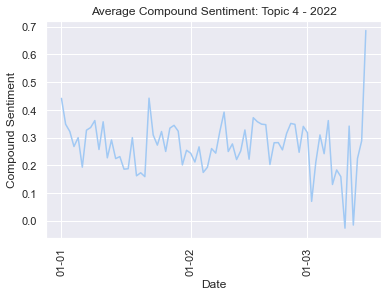

(-6.477342924382647, 1.3210723859829995e-08, 0, 73, {'1%': -3.5232835753964475, '5%': -2.902030597326081, '10%': -2.5883710883843123}, -100.78790891872967)
0.2717693243136505


In [62]:
plot = sns.lineplot(x="published", y="compound", data=topic_3_2022)
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment: Topic 4 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_3_2022["compound"]))
print(mean(topic_3_2022["compound"]))

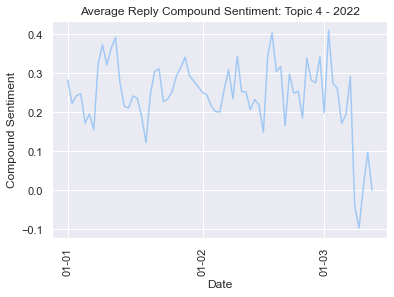

(-2.658846002470288, 0.08143442348652657, 5, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, -125.78971776309015)
0.24285547356599368


In [83]:
plot = sns.lineplot(x="published", y="compound", data=replies_topic_3_2022)
plt.xticks(rotation=90)
plt.title('Average Reply Compound Sentiment: Topic 4 - 2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(replies_topic_3_2022["compound"]))
print(mean(replies_topic_3_2022["compound"]))

6130     -0.5423
6131      0.4754
6132      0.0000
6133      0.0000
6134      0.0516
           ...  
532352    0.6249
532353    0.5766
532354    0.7947
532355    0.6872
532356    0.0000
Name: compound, Length: 143413, dtype: float64


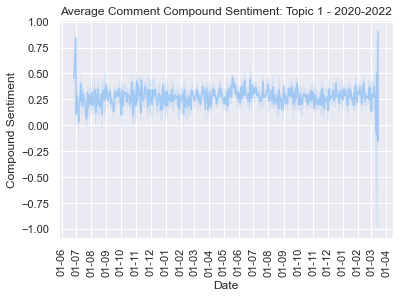

(-29.406927806952822, 0.0, 73, 143339, {'1%': -3.430395622036646, '5%': -2.8615601642926234, '10%': -2.566780732735661}, 198094.87083198098)
0.28485717194396604


In [81]:
print(topic_0_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=topic_0_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 1 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))

plt.show()

print(adfuller(topic_0_df["compound"]))
print(mean(topic_0_df["compound"]))

0         0.8883
1         0.7845
2        -0.7351
3        -0.2561
4         0.9940
           ...  
532410    0.5309
532411    0.7494
532412   -0.0276
532413    0.8658
532414   -0.9042
Name: compound, Length: 172128, dtype: float64


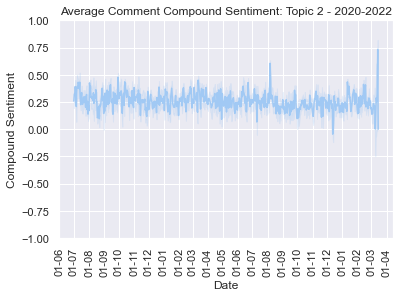

(-28.582852484372633, 0.0, 78, 172049, {'1%': -3.4303880089251777, '5%': -2.8615567994269693, '10%': -2.5667789417336153}, 251049.48249061705)
0.2629457566462168


In [80]:
print(topic_1_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=topic_1_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 2 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(topic_1_df["compound"]))
print(mean(topic_1_df["compound"]))

8841     -0.3865
8842      0.5574
8843      0.1613
8844     -0.4019
8845     -0.6808
           ...  
532494   -0.1877
532495    0.2500
532496    0.5081
532497   -0.2244
532498    0.0000
Name: compound, Length: 100261, dtype: float64


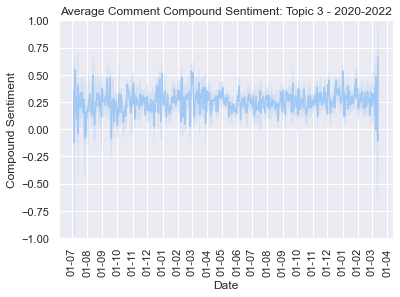

(-24.773782526137797, 0.0, 68, 100192, {'1%': -3.4304152693582943, '5%': -2.861568848034403, '10%': -2.5667853547991473}, 143310.11136821116)
0.25767042319545985


In [79]:
print(topic_2_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=topic_2_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 3 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(topic_2_df["compound"]))
print(mean(topic_2_df["compound"]))

4910      0.3612
4911      0.9801
4912      0.8481
4913      0.7003
4914      0.0000
           ...  
532519    0.0000
532520    0.8059
532521    0.0387
532522   -0.5187
532523    0.4019
Name: compound, Length: 113499, dtype: float64


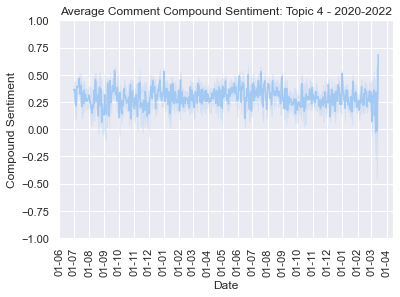

(-24.0722782948935, 0.0, 69, 113429, {'1%': -3.43040765234634, '5%': -2.861565481467089, '10%': -2.5667835628874838}, 158210.32469441512)
0.30577969321315607


In [78]:
print(topic_3_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=topic_3_df)
plt.xticks(rotation=90)
plt.title('Average Comment Compound Sentiment: Topic 4 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(topic_3_df["compound"]))
print(mean(topic_3_df["compound"]))

1598      0.0000
1599     -0.6369
1600      0.3818
1601     -0.1027
1602      0.7964
           ...  
400553    0.0000
400554    0.8593
400555    0.0000
400556    0.4023
400557    0.6082
Name: compound, Length: 100072, dtype: float64


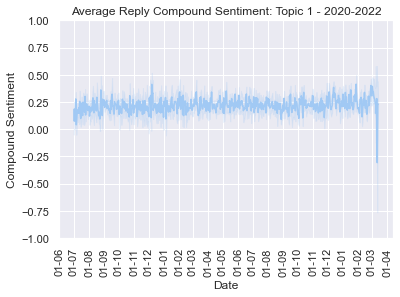

(-37.999623314968666, 0.0, 45, 100026, {'1%': -3.430415377680046, '5%': -2.8615688959103935, '10%': -2.566785380281954}, 120591.25645789094)
0.2166540860580382


In [74]:
print(replies_topic_0_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=replies_topic_0_df)
plt.xticks(rotation=90)
plt.title('Average Reply Compound Sentiment: Topic 1 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(replies_topic_0_df["compound"]))
print(mean(replies_topic_0_df["compound"]))

0         0.2263
1         0.6927
2         0.4404
3         0.5423
4        -0.8748
           ...  
400627    0.8932
400628   -0.2023
400629    0.4019
400630    0.0000
400631   -0.6369
Name: compound, Length: 125045, dtype: float64


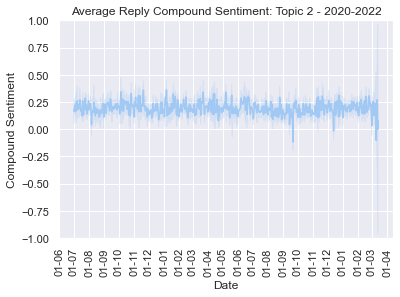

(-42.79087345189743, 0.0, 45, 124999, {'1%': -3.4304023158928802, '5%': -2.8615631228559817, '10%': -2.5667823074782374}, 161963.01799067945)
0.18729343836218962


In [75]:
print(replies_topic_1_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=replies_topic_1_df)
plt.xticks(rotation=90)
plt.title('Average Reply Compound Sentiment: Topic 2 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(replies_topic_1_df["compound"]))
print(mean(replies_topic_1_df["compound"]))

2980      0.0000
2981      0.3182
2982      0.2263
2983      0.9376
2984      0.3291
           ...  
400723    0.8885
400724    0.0000
400725   -0.6632
400726    0.3391
400727    0.6514
Name: compound, Length: 78839, dtype: float64


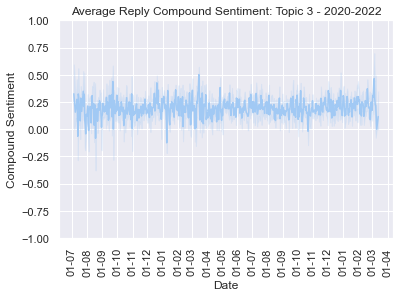

(-29.048867398054057, 0.0, 57, 78781, {'1%': -3.430433008759529, '5%': -2.8615766884623244, '10%': -2.5667895280036532}, 100299.7385007215)
0.19289398774718097


In [76]:
print(replies_topic_2_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=replies_topic_2_df)
plt.xticks(rotation=90)
plt.title('Average Reply Compound Sentiment: Topic 3 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(replies_topic_2_df["compound"]))
print(mean(replies_topic_2_df["compound"]))

1220      0.2724
1221     -0.6249
1222     -0.1779
1223      0.5267
1224      0.0000
           ...  
400777    0.0000
400778    0.0000
400779    0.0000
400780    0.0000
400781    0.7555
Name: compound, Length: 93254, dtype: float64


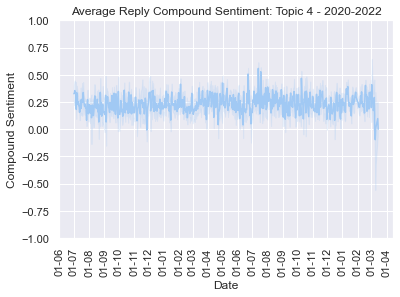

(-24.98563681019385, 0.0, 66, 93187, {'1%': -3.430420175884421, '5%': -2.8615710166164825, '10%': -2.5667865090639648}, 116086.71576119086)
0.23553339588650354


In [77]:
print(replies_topic_3_df["compound"])
plot = sns.lineplot(x="published", y="compound", data=replies_topic_3_df)
plt.xticks(rotation=90)
plt.title('Average Reply Compound Sentiment: Topic 4 - 2020-2022')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment')
plot.xaxis.set_major_locator(md.MonthLocator())
plot.xaxis.set_major_formatter(md.DateFormatter('%d-%m'))
plot.xaxis.set_minor_locator(md.DayLocator(interval = 1))
plt.ylim(-1, 1)

plt.show()

print(adfuller(replies_topic_3_df["compound"]))
print(mean(replies_topic_3_df["compound"]))

In [87]:
merged_replies_grouped = merged_replies.groupby(['sentiment']).size()
replies_positive_total = merged_replies_grouped['Positive']


replies_neutral_total = merged_replies_grouped['Neutral']


replies_negative_total = merged_replies_grouped['Negative']


topic_labels = ['Positive', 'Neutral', 'Negative' ]
replies_topic_total_data = [replies_positive_total, replies_neutral_total, replies_negative_total]

In [88]:
merged_comments_grouped = merged_comments.groupby(['sentiment']).size()

positive_total = merged_comments_grouped['Positive']


neutral_total = merged_comments_grouped['Neutral']


negative_total = merged_comments_grouped['Negative']


topic_labels = ['Positive', 'Neutral', 'Negative' ]
topic_total_data = [positive_total, neutral_total, negative_total]


sentiment
Negative    112674
Neutral      96180
Positive    323670
dtype: int64


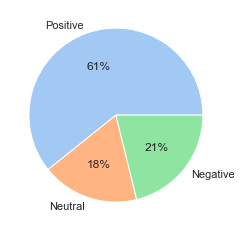

In [89]:
print(merged_comments_grouped)
plt.pie(topic_total_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

sentiment
Negative     87106
Neutral      95191
Positive    218485
dtype: int64


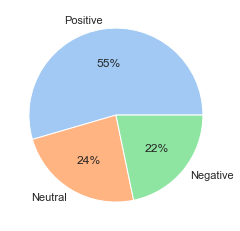

In [90]:
print(merged_replies_grouped)
plt.pie(replies_topic_total_data, labels = topic_labels, autopct='%.0f%%')
plt.show()

In [91]:
def word_count(row):
    split = row["comment"].split(" ")
    return len(split)

merged_comments["words_in_comment"] = merged_comments.apply (lambda row: word_count(row), axis=1)
merged_replies["words_in_comment"] = merged_replies.apply (lambda row: word_count(row), axis=1)

negative_replies = merged_replies.loc[(merged_replies['sentiment'] == "Negative") & (merged_replies['words_in_comment'] >= 100)]
negative_comments = merged_comments.loc[(merged_comments['sentiment'] == "Negative") & (merged_comments['words_in_comment'] >= 100)]

In [92]:
negative_replies.to_csv("negative_replies-min_100words.csv")

In [37]:
negative_comments.to_csv("negative_comments-min_100words.csv")

In [40]:
print(topic_0_2022)

     published  compound  anomaly_points
0   01-01-2022  0.245894             NaN
1   02-01-2022  0.290640             NaN
2   03-01-2022  0.320846             NaN
3   04-01-2022  0.349167             NaN
4   05-01-2022  0.286185             NaN
..         ...       ...             ...
69  11-03-2022  0.188567             NaN
70  12-03-2022 -0.102600       -0.102600
71  13-03-2022  0.498543             NaN
72  14-03-2022 -0.157467       -0.157467
73  15-03-2022  0.904200             NaN

[74 rows x 3 columns]


In [93]:
data = []
year_2020_df = pd.DataFrame(data)

year_2020_df['Topic 1 - 2020'] = topic_0_2020['compound']
year_2020_df['Topic 2 - 2020'] = topic_1_2020['compound']
year_2020_df['Topic 3 - 2020'] = topic_2_2020['compound']
year_2020_df['Topic 4 - 2020'] = topic_3_2020['compound']

data = []
year_2021_df = pd.DataFrame(data)

year_2021_df['Topic 1 - 2021'] = topic_0_2021['compound']
year_2021_df['Topic 2 - 2021'] = topic_1_2021['compound']
year_2021_df['Topic 3 - 2021'] = topic_2_2021['compound']
year_2021_df['Topic 4 - 2021'] = topic_3_2021['compound']


data = []
year_2022_df = pd.DataFrame(data)

year_2022_df['Topic 1 - 2022'] = topic_0_2022['compound']
year_2022_df['Topic 2 - 2022'] = topic_1_2022['compound']
year_2022_df['Topic 3 - 2022'] = topic_2_2022['compound']
year_2022_df['Topic 4 - 2022'] = topic_3_2022['compound']

In [94]:
data = []
replies_year_2020_df = pd.DataFrame(data)

replies_year_2020_df['Topic 1 - 2020'] = replies_topic_0_2020['compound']
replies_year_2020_df['Topic 2 - 2020'] = replies_topic_1_2020['compound']
replies_year_2020_df['Topic 3 - 2020'] = replies_topic_2_2020['compound']
replies_year_2020_df['Topic 4 - 2020'] = replies_topic_3_2020['compound']

data = []
replies_year_2021_df = pd.DataFrame(data)

replies_year_2021_df['Topic 1 - 2021'] = replies_topic_0_2021['compound']
replies_year_2021_df['Topic 2 - 2021'] = replies_topic_1_2021['compound']
replies_year_2021_df['Topic 3 - 2021'] = replies_topic_2_2021['compound']
replies_year_2021_df['Topic 4 - 2021'] = replies_topic_3_2021['compound']


data = []
replies_year_2022_df = pd.DataFrame(data)

replies_year_2022_df['Topic 1 - 2022'] = replies_topic_0_2022['compound']
replies_year_2022_df['Topic 2 - 2022'] = replies_topic_1_2022['compound']
replies_year_2022_df['Topic 3 - 2022'] = replies_topic_2_2022['compound']
replies_year_2022_df['Topic 4 - 2022'] = replies_topic_3_2022['compound']


Median: 
0.19549002560819462
0.19223581361560815
0.18830319816053515
0.21136505720238313

Mean: 
0.19917083891316434
0.19717590844256655
0.1858994195506537
0.21707062168310917

Mode: 
0.15
0.18
0.18
0.24

STD: 
0.057710815873152785
0.04912096190836795
0.08032108319002233
0.06642633760877996


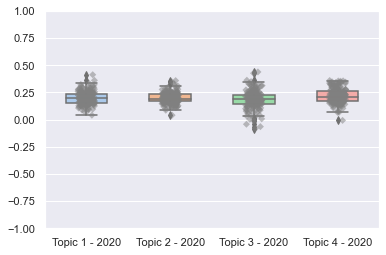

In [95]:
# Replies 2020
replies_bplot_20 = sns.boxplot(data=replies_year_2020_df, 
                 width=0.5, palette="pastel")
plt.ylim(-1, 1)

replies_bplot_20=sns.stripplot(data=replies_year_2020_df, 
                   jitter=True, 
                   marker='D', 
                   alpha=0.5,
                   color='grey')

print("\nMedian: ")
print(statistics.median(replies_year_2020_df['Topic 1 - 2020']))
print(statistics.median(replies_year_2020_df['Topic 2 - 2020']))
print(statistics.median(replies_year_2020_df['Topic 3 - 2020']))
print(statistics.median(replies_year_2020_df['Topic 4 - 2020']))
print("\nMean: ")
print(np.nanmean(replies_year_2020_df['Topic 1 - 2020']))
print(np.nanmean(replies_year_2020_df['Topic 2 - 2020']))
print(np.nanmean(replies_year_2020_df['Topic 3 - 2020']))
print(np.nanmean(replies_year_2020_df['Topic 4 - 2020']))
print("\nMode: ")
print(statistics.mode(round(replies_year_2020_df['Topic 1 - 2020'], 2)))
print(statistics.mode(round(replies_year_2020_df['Topic 2 - 2020'], 2)))
print(statistics.mode(round(replies_year_2020_df['Topic 3 - 2020'], 2)))
print(statistics.mode(round(replies_year_2020_df['Topic 4 - 2020'], 2)))
print("\nSTD: ")
print(np.nanstd(replies_year_2020_df['Topic 1 - 2020']))
print(np.nanstd(replies_year_2020_df['Topic 2 - 2020']))
print(np.nanstd(replies_year_2020_df['Topic 3 - 2020']))
print(np.nanstd(replies_year_2020_df['Topic 4 - 2020']))



Median: 
0.26663575623343067
0.27686472571532716
0.2487155303030303
0.2891790451149785

Mean: 
0.26492426678065273
0.27660296771140247
0.2366590792273855
0.2874357765798176

Mode: 
0.29
0.3
0.27
0.26

STD: 
0.08578294987655304
0.07148856550419674
0.10840632733055477
0.08765469092797243


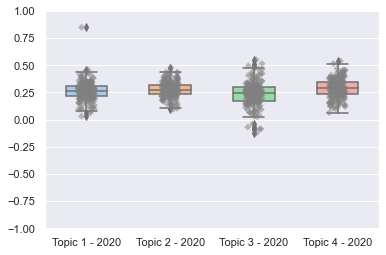

In [96]:
# Comments 2020
bplot_20 = sns.boxplot(data=year_2020_df, 
                 width=0.5, palette="pastel")
plt.ylim(-1, 1)

bplot_20=sns.stripplot(data=year_2020_df, 
                   jitter=True, 
                   marker='D', 
                   alpha=0.5,
                   color='grey')

print("\nMedian: ")
print(statistics.median(year_2020_df['Topic 1 - 2020']))
print(statistics.median(year_2020_df['Topic 2 - 2020']))
print(statistics.median(year_2020_df['Topic 3 - 2020']))
print(statistics.median(year_2020_df['Topic 4 - 2020']))
print("\nMean: ")
print(np.nanmean(year_2020_df['Topic 1 - 2020']))
print(np.nanmean(year_2020_df['Topic 2 - 2020']))
print(np.nanmean(year_2020_df['Topic 3 - 2020']))
print(np.nanmean(year_2020_df['Topic 4 - 2020']))
print("\nMode: ")
print(statistics.mode(round(year_2020_df['Topic 1 - 2020'], 2)))
print(statistics.mode(round(year_2020_df['Topic 2 - 2020'], 2)))
print(statistics.mode(round(year_2020_df['Topic 3 - 2020'], 2)))
print(statistics.mode(round(year_2020_df['Topic 4 - 2020'], 2)))
print("\nSTD: ")
print(np.nanstd(year_2020_df['Topic 1 - 2020']))
print(np.nanstd(year_2020_df['Topic 2 - 2020']))
print(np.nanstd(year_2020_df['Topic 3 - 2020']))
print(np.nanstd(year_2020_df['Topic 4 - 2020']))



Median: 
0.2762822314049587
0.24394887892376685
0.25615176470588236
0.29665267857142863

Mean: 
0.27802035359686295
0.24758978450512803
0.25745444131963346
0.30110891672748336

Mode: 
0.28
0.24
0.25
0.28

STD: 
0.05809122463335031
0.0700792268985398
0.07616453908985579
0.07207147042489923


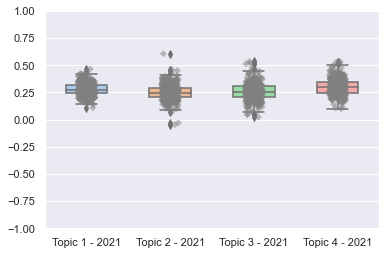

In [97]:
# Comments 2021
bplot_21 = sns.boxplot(data=year_2021_df, 
                 width=0.5, palette="pastel")
plt.ylim(-1, 1)

bplot_21=sns.stripplot(data=year_2021_df, 
                   jitter=True, 
                   marker='D', 
                   alpha=0.5,
                   color='grey')
print("\nMedian: ")
print(statistics.median(year_2021_df['Topic 1 - 2021']))
print(statistics.median(year_2021_df['Topic 2 - 2021']))
print(statistics.median(year_2021_df['Topic 3 - 2021']))
print(statistics.median(year_2021_df['Topic 4 - 2021']))
print("\nMean: ")
print(np.nanmean(year_2021_df['Topic 1 - 2021']))
print(np.nanmean(year_2021_df['Topic 2 - 2021']))
print(np.nanmean(year_2021_df['Topic 3 - 2021']))
print(np.nanmean(year_2021_df['Topic 4 - 2021']))
print("\nMode: ")
print(statistics.mode(round(year_2021_df['Topic 1 - 2021'], 2)))
print(statistics.mode(round(year_2021_df['Topic 2 - 2021'], 2)))
print(statistics.mode(round(year_2021_df['Topic 3 - 2021'], 2)))
print(statistics.mode(round(year_2021_df['Topic 4 - 2021'], 2)))
print("\nSTD: ")
print(np.nanstd(year_2021_df['Topic 1 - 2021']))
print(np.nanstd(year_2021_df['Topic 2 - 2021']))
print(np.nanstd(year_2021_df['Topic 3 - 2021']))
print(np.nanstd(year_2021_df['Topic 4 - 2021']))


Median: 
0.2187716814159292
0.18469578947368423
0.19075373831775702
0.23127945205479455

Mean: 
0.2235315962771211
0.18878906151694172
0.1958097689715103
0.2375085989753331

Mode: 
0.19
0.18
0.19
0.21

STD: 
0.04922942889478525
0.05582354122889699
0.0696329717874057
0.07605914599609331


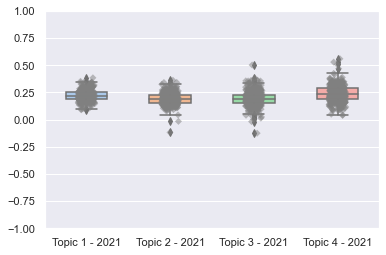

In [98]:
# Replies 2021
replies_bplot_21 = sns.boxplot(data=replies_year_2021_df, 
                 width=0.5, palette="pastel")
plt.ylim(-1, 1)

replies_bplot_21=sns.stripplot(data=replies_year_2021_df, 
                   jitter=True, 
                   marker='D', 
                   alpha=0.5,
                   color='grey')
print("\nMedian: ")
print(statistics.median(replies_year_2021_df['Topic 1 - 2021']))
print(statistics.median(replies_year_2021_df['Topic 2 - 2021']))
print(statistics.median(replies_year_2021_df['Topic 3 - 2021']))
print(statistics.median(replies_year_2021_df['Topic 4 - 2021']))
print("\nMean: ")
print(np.nanmean(replies_year_2021_df['Topic 1 - 2021']))
print(np.nanmean(replies_year_2021_df['Topic 2 - 2021']))
print(np.nanmean(replies_year_2021_df['Topic 3 - 2021']))
print(np.nanmean(replies_year_2021_df['Topic 4 - 2021']))
print("\nMode: ")
print(statistics.mode(round(replies_year_2021_df['Topic 1 - 2021'], 2)))
print(statistics.mode(round(replies_year_2021_df['Topic 2 - 2021'], 2)))
print(statistics.mode(round(replies_year_2021_df['Topic 3 - 2021'], 2)))
print(statistics.mode(round(replies_year_2021_df['Topic 4 - 2021'], 2)))
print("\nSTD: ")
print(np.nanstd(replies_year_2021_df['Topic 1 - 2021']))
print(np.nanstd(replies_year_2021_df['Topic 2 - 2021']))
print(np.nanstd(replies_year_2021_df['Topic 3 - 2021']))
print(np.nanstd(replies_year_2021_df['Topic 4 - 2021']))


Median: 
0.286191964491205
0.2344700168918919
0.2838754859941834
0.27052971785383906

Mean: 
0.2826213720359382
0.25123483485567083
0.2781245422230413
0.27176932431365036

Mode: 
0.27
0.23
0.3
0.32

STD: 
0.12148224319364616
0.09865976744586286
0.11085359712359809
0.098779453700144


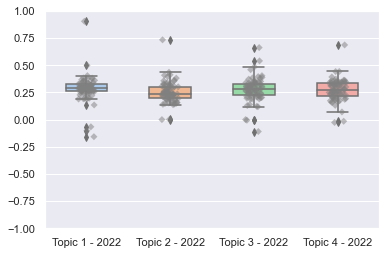

In [99]:
# Comments 2022
bplot_22 = sns.boxplot(data=year_2022_df, 
                 width=0.5, palette="pastel")
plt.ylim(-1, 1)

bplot_22=sns.stripplot(data=year_2022_df, 
                   jitter=True, 
                   marker='D', 
                   alpha=0.5,
                   color='grey')
print("\nMedian: ")
print(statistics.median(year_2022_df['Topic 1 - 2022']))
print(statistics.median(year_2022_df['Topic 2 - 2022']))
print(statistics.median(year_2022_df['Topic 3 - 2022']))
print(statistics.median(year_2022_df['Topic 4 - 2022']))
print("\nMean: ")
print(np.nanmean(year_2022_df['Topic 1 - 2022']))
print(np.nanmean(year_2022_df['Topic 2 - 2022']))
print(np.nanmean(year_2022_df['Topic 3 - 2022']))
print(np.nanmean(year_2022_df['Topic 4 - 2022']))
print("\nMode: ")
print(statistics.mode(round(year_2022_df['Topic 1 - 2022'], 2)))
print(statistics.mode(round(year_2022_df['Topic 2 - 2022'], 2)))
print(statistics.mode(round(year_2022_df['Topic 3 - 2022'], 2)))
print(statistics.mode(round(year_2022_df['Topic 4 - 2022'], 2)))
print("\nSTD: ")
print(np.nanstd(year_2022_df['Topic 1 - 2022']))
print(np.nanstd(year_2022_df['Topic 2 - 2022']))
print(np.nanstd(year_2022_df['Topic 3 - 2022']))
print(np.nanstd(year_2022_df['Topic 4 - 2022']))





Median: 
0.25076000000000004
0.20054285714285716
0.2296175925925926
0.2521125925925926

Mean: 
0.2447856852274952
0.1923285860371093
0.22342972980909453
0.24285547356599368

Mode: 
0.19
0.21
0.3
0.25

STD: 
0.09212410623886214
0.06413637714023869
0.0744824056146241
0.09288217257462861


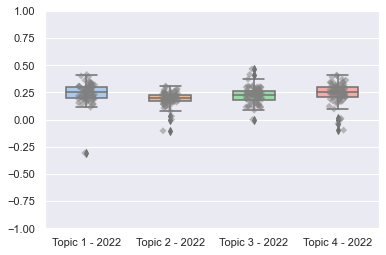

In [100]:
# Replies 2022
replies_bplot_22 = sns.boxplot(data=replies_year_2022_df, 
                 width=0.5, palette="pastel")
plt.ylim(-1, 1)

replies_bplot_22=sns.stripplot(data=replies_year_2022_df, 
                   jitter=True, 
                   marker='D', 
                   alpha=0.5,
                   color='grey')
print("\nMedian: ")
print(statistics.median(replies_year_2022_df['Topic 1 - 2022']))
print(statistics.median(replies_year_2022_df['Topic 2 - 2022']))
print(statistics.median(replies_year_2022_df['Topic 3 - 2022']))
print(statistics.median(replies_year_2022_df['Topic 4 - 2022']))
print("\nMean: ")
print(np.nanmean(replies_year_2022_df['Topic 1 - 2022']))
print(np.nanmean(replies_year_2022_df['Topic 2 - 2022']))
print(np.nanmean(replies_year_2022_df['Topic 3 - 2022']))
print(np.nanmean(replies_year_2022_df['Topic 4 - 2022']))
print("\nMode: ")
print(statistics.mode(round(replies_year_2022_df['Topic 1 - 2022'], 2)))
print(statistics.mode(round(replies_year_2022_df['Topic 2 - 2022'], 2)))
print(statistics.mode(round(replies_year_2022_df['Topic 3 - 2022'], 2)))
print(statistics.mode(round(replies_year_2022_df['Topic 4 - 2022'], 2)))
print("\nSTD: ")
print(np.nanstd(replies_year_2022_df['Topic 1 - 2022']))
print(np.nanstd(replies_year_2022_df['Topic 2 - 2022']))
print(np.nanstd(replies_year_2022_df['Topic 3 - 2022']))
print(np.nanstd(replies_year_2022_df['Topic 4 - 2022']))


